In [136]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import statsmodels as sm
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
import math
warnings.filterwarnings('ignore')

Objective-The goal of how many existing customers to retain for continous business ,here we do analysis of telecom industery customer retantaion ,because in telecom we have seen many customer switch to other service because of service issue

In [45]:
customer=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\Telecom_customer_churn.csv")
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
#shape of dataset
customer.shape

(7043, 21)

dataset have 21 rows and 7043 column

In [48]:
print(customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


most of the data are object only MonthlyCharges, SeniorCitizen and tenure are continous values,but TotalCharges is numerical values and its showing object which need to be resolve issue

In [49]:
#check how many unique value present in customer's TotalCharges column
customer['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

'...' show some space present in this conitous column thats why its count object ,we need to convert space into numerical values

In [50]:
#convert space into null values
customer['TotalCharges']=customer['TotalCharges'].replace(' ',np.NaN)

In [51]:
#customer dataset check null values
customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

converting column TotalCharges object type to float type because charges values is float type it may be intger as well 

In [52]:
customer['TotalCharges']=customer['TotalCharges'].astype(float)

In [53]:
#now handel null values of TotalCharges column,data is float type lets fill nan with mean value
customer['TotalCharges']=customer['TotalCharges'].fillna(customer['TotalCharges'].mean())

In [54]:
#recheck null values
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

no null values present now

In [55]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


SeniorCitizen column seems not so much deviation ,tenure and MonthlyCharges have deviation, Seniocitizen have many values belong to zero, tenure min values have zero monthly charges data seems quite well distributed but there are deviation present and TotalCharges column data distributed  have huge deviation presence. distribution at max level not so outliers as it seem quite ok distribution of data

In [56]:
#check how many unique count present in dataset
customer.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [57]:
#select only Categorical data for analysis
customer_object=customer[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]

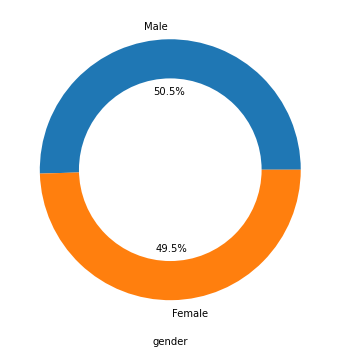

<Figure size 432x288 with 0 Axes>

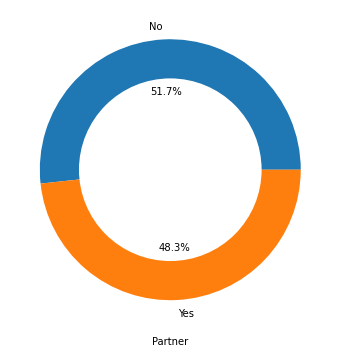

<Figure size 432x288 with 0 Axes>

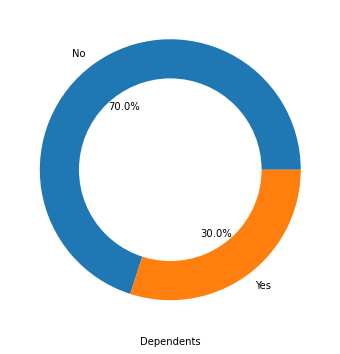

<Figure size 432x288 with 0 Axes>

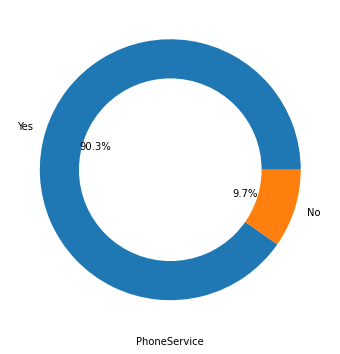

<Figure size 432x288 with 0 Axes>

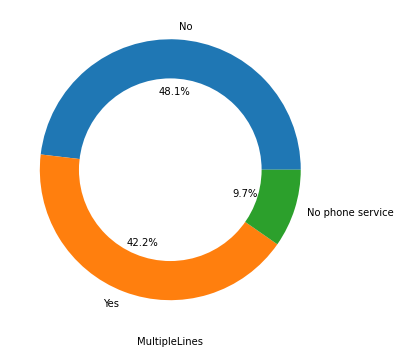

<Figure size 432x288 with 0 Axes>

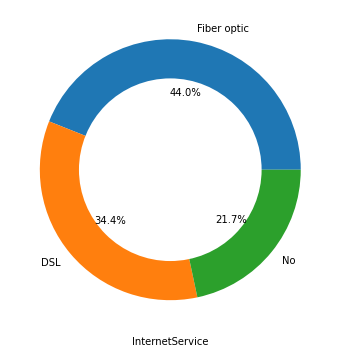

<Figure size 432x288 with 0 Axes>

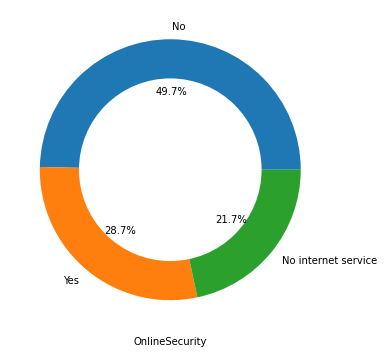

<Figure size 432x288 with 0 Axes>

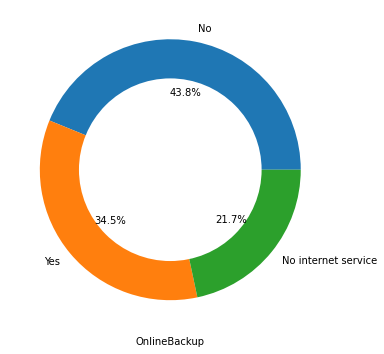

<Figure size 432x288 with 0 Axes>

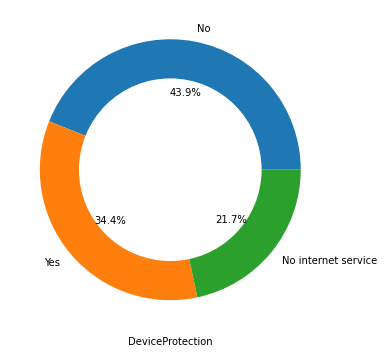

<Figure size 432x288 with 0 Axes>

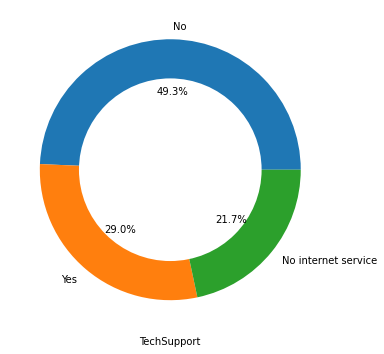

<Figure size 432x288 with 0 Axes>

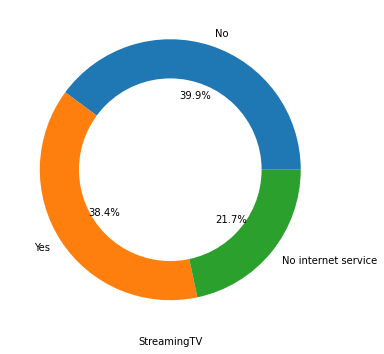

<Figure size 432x288 with 0 Axes>

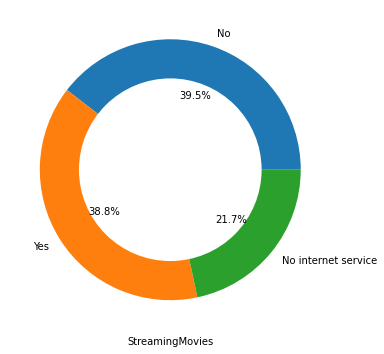

<Figure size 432x288 with 0 Axes>

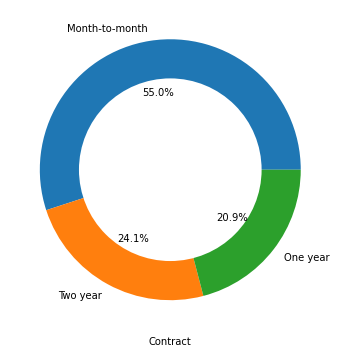

<Figure size 432x288 with 0 Axes>

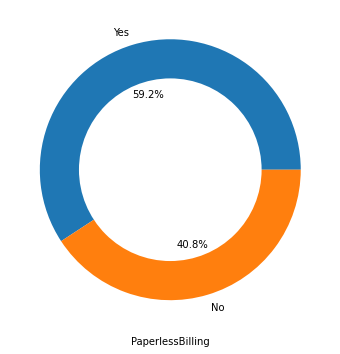

<Figure size 432x288 with 0 Axes>

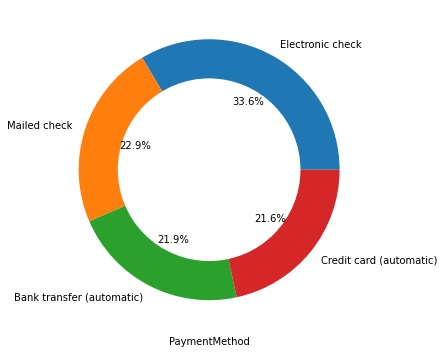

<Figure size 432x288 with 0 Axes>

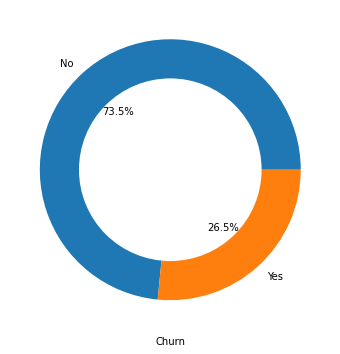

<Figure size 432x288 with 0 Axes>

In [58]:
#piechart analysis for object data
for i in customer_object:
        plt.figure(figsize=(8,6))
        customer_object[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()
        

Minimum 0
Maximum 72


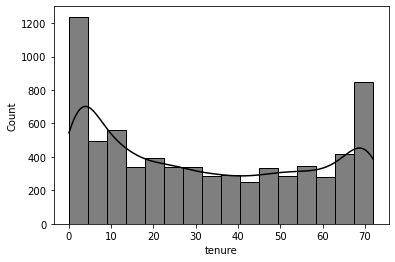

In [59]:
#tenure data hist plot distribution
sns.histplot(customer['tenure'],kde=True,color='k')
print('Minimum',customer['tenure'].min())
print('Maximum',customer['tenure'].max())

tenure data not normally distributed most of customer belong to 0 to 5 year

Minimum 18.25
Maximum 118.75


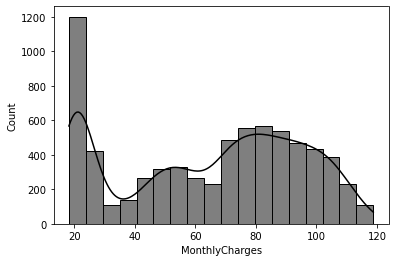

In [60]:
#MonthelyCharges data histplot distribution 
sns.histplot(customer['MonthlyCharges'],kde=True,color='k')
print('Minimum',customer['MonthlyCharges'].min())
print('Maximum',customer['MonthlyCharges'].max())

MonthlyCharges data distribution is normal ,but major customers belong to 18.25 to 25 plan means minimun balnce maintaing have majority  

Minimum 18.8
Maximum 8684.8


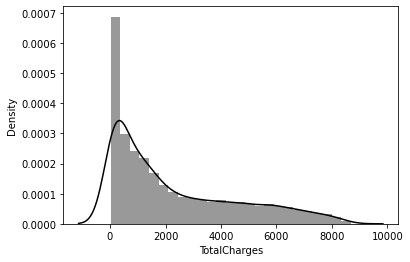

In [61]:
#Total Charges data  hist distribution
sns.distplot(customer['TotalCharges'],kde=True,color='k')
print('Minimum',customer['TotalCharges'].min())
print('Maximum',customer['TotalCharges'].max())

Total charges data is right skewed with 18.8 to 500 is at maximum 

Minimum 0
Maximum 1


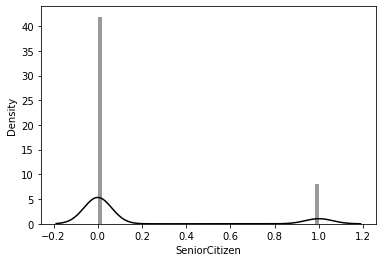

In [62]:
#SeniorCitizen data  hist distribution
sns.distplot(customer['SeniorCitizen'],kde=True,color='k')
print('Minimum',customer['SeniorCitizen'].min())
print('Maximum',customer['SeniorCitizen'].max())

SeniorCitizen column only two category data 0 and 1 

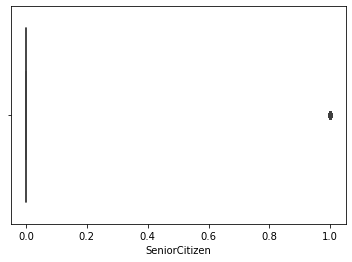

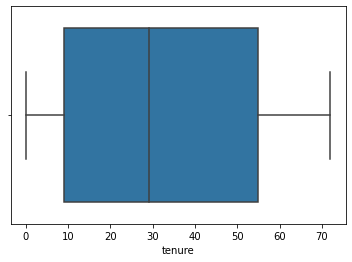

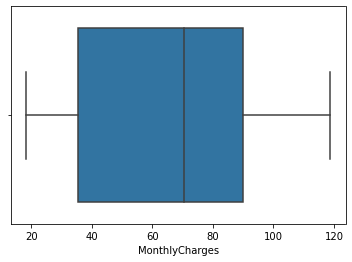

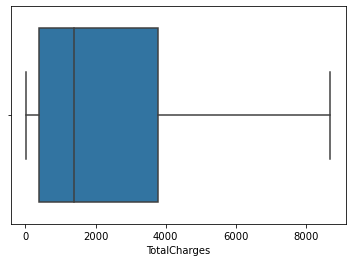

<Figure size 432x288 with 0 Axes>

In [63]:
#boxplot of continous dataset
cont=customer[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
for i in cont:
    sns.boxplot(customer[i])
    plt.figure()


no outliers observe  in TotalCharges, MonthlyCharges, tenure, only SeniorCitizen have outliers but its categorical dataset if we remove one category our model will train for only one data and model become baised

# Encoding of Categorical variable

In [64]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder()

In [65]:
for i in customer.columns:
    if customer[i].dtypes=='object':
        customer[i]=ord.fit_transform(customer[i].values.reshape(-1,1))

In [66]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


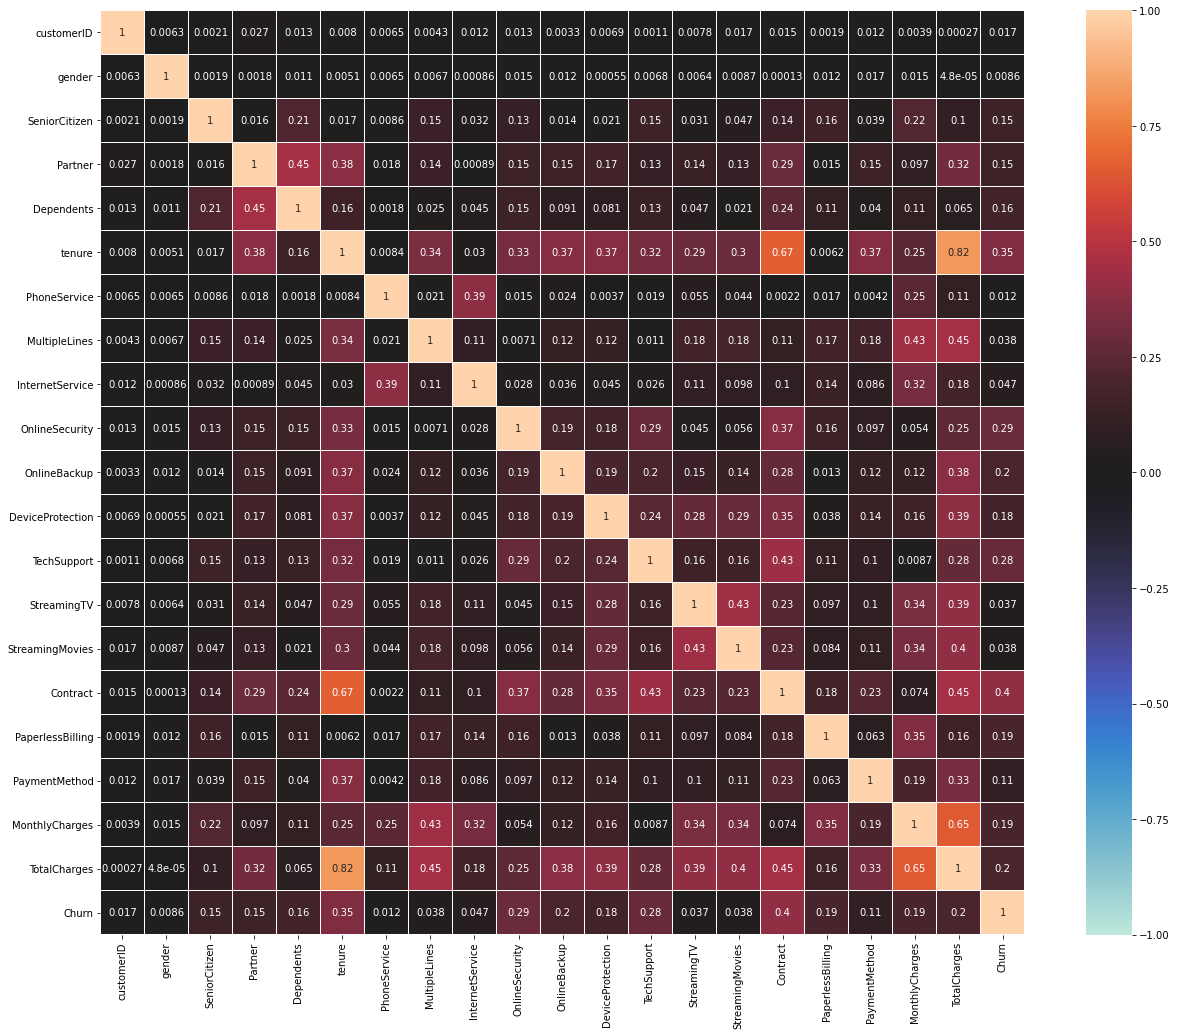

In [67]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=customer.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

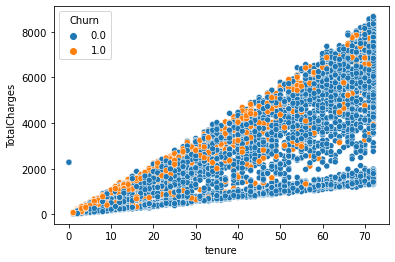

In [68]:
#scatter plot to check correlation between tenure and TotalCharges
sns.scatterplot(x='tenure',y='TotalCharges', hue='Churn',data=customer)

Weak linear correlation between tenure and TotalCharges

<AxesSubplot:xlabel='tenure', ylabel='Contract'>

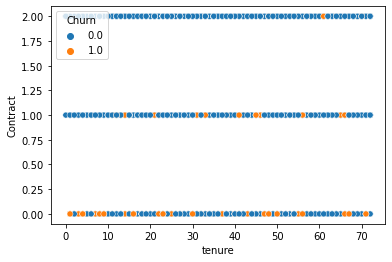

In [69]:
#scatter plot to check correlation between Contract and tenure
sns.scatterplot(x='tenure',y='Contract', hue='Churn',data=customer)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

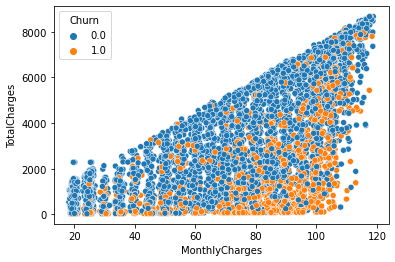

In [70]:
#scatter plot to check correlation between tenure and TotalCharges
sns.scatterplot(x='MonthlyCharges',y='TotalCharges', hue='Churn',data=customer)

Weak correlation

In [71]:
#check how much correlation with Churn 
corr_matrix=customer.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<AxesSubplot:title={'center':'correlation with target'}>

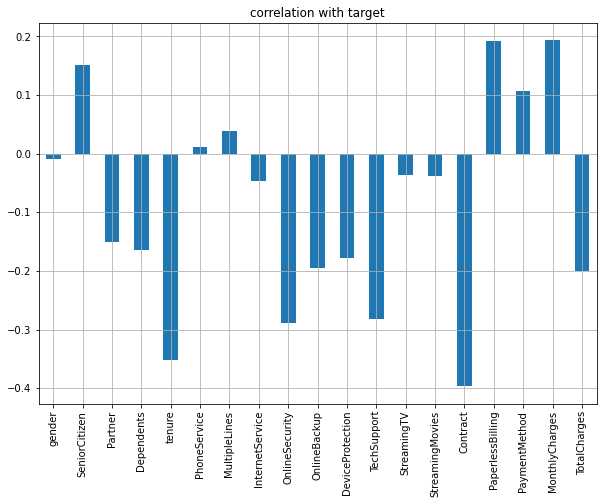

In [81]:
#take same data and visualize the correlation with class 
customer.drop('Churn',axis=1).corrwith(customer.Churn).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with target')

In [72]:
#check skewness of dataset
customer.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [75]:
#dropping nominal data customerID
customer.drop(columns='customerID',axis=1,inplace=True)
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


<AxesSubplot:xlabel='Churn', ylabel='count'>

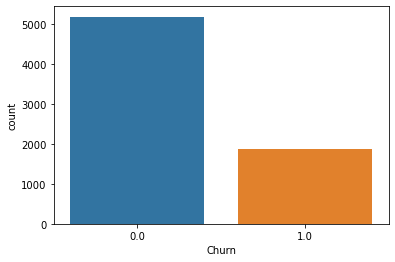

In [86]:
#count plot to check class is balanced 
sns.countplot(x='Churn',data=customer)

Class is imbalanced No(0) have majority while Yes(1) is lesser model will biased so need to balanced 

# Seprating Columns into features and label,balanced class

In [162]:
#seprate featurs and label
Y=customer.Churn
X=customer.drop(columns='Churn',axis=1)

In [163]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7,stratify=Y)

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7)

In [165]:
from sklearn.utils import resample

In [166]:
x=pd.concat([x_train,y_train],axis=1)

In [167]:
Churn_Yes=x[x.Churn==1]
Churn_No=x[x.Churn==0]

In [168]:
#upsamling minority
sampled=resample(Churn_No,replace=True, #sample with replacement
                   n_samples=len(Churn_Yes), #match number is majority class
                    random_state=27) #reproduciable result

In [169]:
#combine majority and upsamled minority
upsample =pd.concat([sampled,Churn_Yes])

In [170]:
#check new class counts   #upsampling use when dataset is small
upsample.Churn.value_counts()

1.0    1300
0.0    1300
Name: Churn, dtype: int64

Now dataset is balanced scale features and build the model

In [171]:
#Scale the feature data and train test split
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.25,random_state=12)

# Logistic Regression Model

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [174]:
y_pred=Lr.predict(x_test)

In [175]:
Lr.score(x_test,y_test)

0.8001135718341851

In [176]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1361
         1.0       0.55      0.64      0.59       400

    accuracy                           0.80      1761
   macro avg       0.72      0.74      0.73      1761
weighted avg       0.81      0.80      0.80      1761



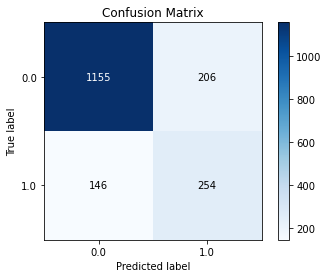

In [177]:
#confusion matrxi
skplt.metrics.plot_confusion_matrix(y_pred,y_test)
plt.show()

In [178]:
from sklearn.model_selection import cross_val_score

In [179]:
#model cross validation
cross_val_score(Lr,X_scaler,Y,cv=5).mean()

0.8023577125943608

Model trained is accurate as per cross validation score match with Model score

# HyperParameter tuning of Logistic reg model

In [180]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [181]:
Lr = LogisticRegression()
grid_values = {'penalty': ['l1' ,'l2'],
               'C':[0.01,.3,0.07,.09,]}

In [182]:
grid_Lr = GridSearchCV(Lr, param_grid = grid_values,scoring = 'recall')
grid_Lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.3, 0.07, 0.09], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [183]:
#Predict values based on new parameters
y_pred = grid_Lr.predict(x_test)

In [184]:
#model score post tuning 
grid_Lr.score(x_train,y_train)

0.5550035486160397

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

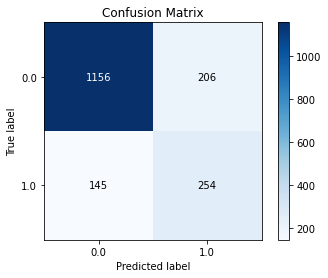

In [185]:
#New Model confusion metrics 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [132]:
#post tuning classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1362
         1.0       0.55      0.64      0.59       399

    accuracy                           0.80      1761
   macro avg       0.72      0.74      0.73      1761
weighted avg       0.81      0.80      0.81      1761



# DecesionTreeClassifier

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [137]:
y_pred=dt.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7308347529812607


In [138]:
#MOdel score
dt.score(x_train,y_train)

0.9977281332828474

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

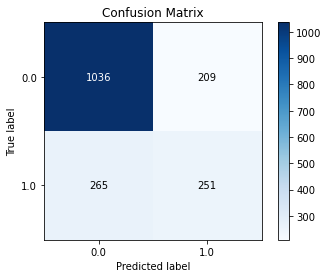

In [141]:
#New Model confusion metrics 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [ ]:
True Positive =1036, False positive(Type error1)=209, False negative(type 2 error)=265, 

In [140]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81      1245
         1.0       0.55      0.49      0.51       516

    accuracy                           0.73      1761
   macro avg       0.67      0.66      0.66      1761
weighted avg       0.72      0.73      0.73      1761



In [142]:
#Cross validation score of model
cross_val_score(dt,X_scaler,Y,cv=5).mean()

0.7276712408865088

So my decesion tree model is 72% accurate lets do improvise model with tuning

# Hyperparamter tuning of Decesion Tree

In [143]:
#we are tuning three hyperparameter right now,we are pasing the diffrent values for both parameters
grid_param={'criterion':['gini','entropy'], #gini and entropy for classification
           'max_depth': range(2,16,3),
           'min_samples_leaf':range(1,16,2),
           'min_samples_split':range(2,10,2)}

In [144]:
#cross validation ,n_jobs menas apply entire CPU to do the job so that in increase process speed
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1) 

In [145]:
#train model with new parameters
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 16, 3),
                         'min_samples_leaf': range(1, 16, 2),
                         'min_samples_split': range(2, 10, 2)})

In [146]:
#chose best parameters
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 15,
 'min_samples_split': 8}

In [147]:
#use these best paraeters now with Decesiontreeclassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=15,min_samples_split=8)

In [148]:
#now DecesionTreeClassifier model fit into train data and calcualte model score
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.8205225293449451

In [149]:
y_pred=dt.predict(x_test)

In [150]:
#classification report post tuning
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1367
         1.0       0.52      0.61      0.56       394

    accuracy                           0.79      1761
   macro avg       0.70      0.73      0.71      1761
weighted avg       0.80      0.79      0.79      1761



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

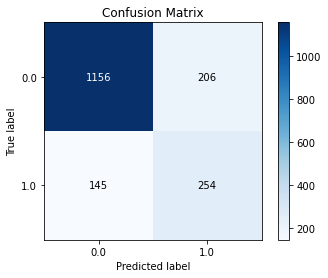

In [186]:
#New Model confusion metrics 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [187]:
#cross validation score post tuning
cross_val_score(dt,X_scaler,Y,cv=5).mean()

0.785320121459449

Model score is improved with better cross validation score slightly overfitting issue

# KNN Classification model

In [222]:
from sklearn.neighbors import KNeighborsClassifier

In [223]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [224]:
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.7495741056218058


In [225]:
#model score
knn.score(x_train,y_train)

0.8347216963271488

In [226]:
print(confusion_matrix(y_pred,y_test))

[[1089  229]
 [ 212  231]]


In [227]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      1318
         1.0       0.50      0.52      0.51       443

    accuracy                           0.75      1761
   macro avg       0.67      0.67      0.67      1761
weighted avg       0.75      0.75      0.75      1761



In [228]:
#crossvalidation of Model
cross_val_score(knn,X_scaler,Y,cv=5).mean()

0.7539395686818503

Model is 75% accurate trained ,lets do parameter Tuning

# HyperPrameter Tuning

In [229]:
#parameters for tuning KNNclassifier model
param={ 'n_neighbors':[5,7,9,11,13],
    'weights':['uniform'],
    'algorithm':['auto'],
    'leaf_size':[4,8,12,16,30]
      }

In [230]:
#GridsearchCV  
grid_search=GridSearchCV(knn,param_grid=param,cv=5,n_jobs=-1)

In [231]:
#fit gridsearch into train data
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [4, 8, 12, 16, 30],
                         'n_neighbors': [5, 7, 9, 11, 13],
                         'weights': ['uniform']})

In [232]:
#find out best parameters to tune KNNmodel
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 4, 'n_neighbors': 13, 'weights': 'uniform'}

In [233]:
#tune model with new parameters
knn=KNeighborsClassifier(algorithm='auto',leaf_size=4,n_neighbors=13,weights='uniform')

In [234]:
#fit KNN model in to training dataset
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=4, n_neighbors=13)

In [235]:
#post tuning model score
knn.score(x_train,y_train)

0.8082165846270352

In [236]:
y_pred=knn.predict(x_test)

In [237]:
#print Classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1339
         1.0       0.51      0.55      0.53       422

    accuracy                           0.76      1761
   macro avg       0.68      0.69      0.69      1761
weighted avg       0.77      0.76      0.77      1761



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

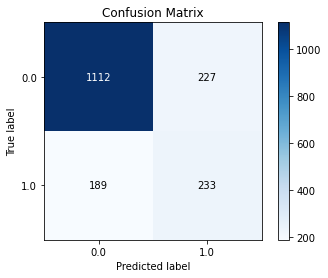

In [238]:
#New Model confusion metrics 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [239]:
#Cross validation score of KNN model
cross_val_score(knn,X_scaler,Y,cv=5).mean()

0.7704110950706498

cross validation score is 77 and mode score is 80 little bit overfit 

# GradientBoostingClassifer Model

In [240]:
from sklearn.ensemble import GradientBoostingClassifier

In [207]:
gdbt_clf= GradientBoostingClassifier()
gdbt_clf.fit(x_train,y_train)
pred=gdbt_clf.predict(x_test)
print(classification_report(y_test,pred ))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1301
         1.0       0.65      0.54      0.59       460

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761



In [208]:
#print Confusion Matrix
print(confusion_matrix(pred,y_test))

[[1165  211]
 [ 136  249]]


In [209]:
#Model Score
gdbt_clf.score(x_train,y_train)

0.8307459295721318

In [210]:
#cross validation of Model score
cross_val_score(gdbt_clf,X_scaler,Y,cv=5).mean()

0.8044881927866314

# Hyperparameter Tuning of GradientBoostClassifer Model

In [211]:
param={'loss':['deviance'],
    'learning_rate':[0.01,0.02,.1,.2,.7],
    'n_estimators':[50,100,150,200],
    'subsample':[1.0,2,4,6]}

In [212]:
#grid search 
grid_search=GridSearchCV(gdbt_clf,param_grid=param,cv=5,n_jobs=-1)

In [213]:
#fit gridsearch into training data
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.1, 0.2, 0.7],
                         'loss': ['deviance'],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [1.0, 2, 4, 6]})

In [214]:
#findout best parameters
grid_search.best_params_

{'learning_rate': 0.02,
 'loss': 'deviance',
 'n_estimators': 200,
 'subsample': 1.0}

In [216]:
#initiate with new parameters 
gdbt_clf=GradientBoostingClassifier(learning_rate=0.02,loss='deviance',n_estimators=200,subsample=1)

In [217]:
#train data set with new parameters
gdbt_clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, n_estimators=200, subsample=1)

In [218]:
#model accuracy
gdbt_clf.score(x_train,y_train)

0.8148428625520636

In [219]:
#classification report post tuning
pred=gdbt_clf.predict(x_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.87      1394
         1.0       0.53      0.66      0.59       367

    accuracy                           0.81      1761
   macro avg       0.72      0.75      0.73      1761
weighted avg       0.83      0.81      0.81      1761



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

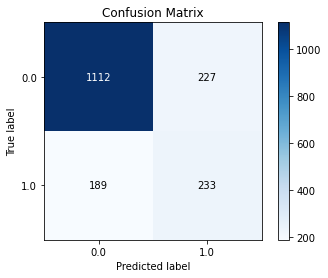

In [241]:
#New Model confusion metrics 
skplt.metrics.plot_confusion_matrix(y_pred,y_test)

In [242]:
#cross validation of Model
cross_val_score(gdbt_clf,X_scaler,Y,cv=5).mean()

0.8027836473320861

Model score and Cross validation score is close GradientBoostClassifier Model is accurate with 81% accuracy

In [243]:
#plot auc roc curve to choose best model
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

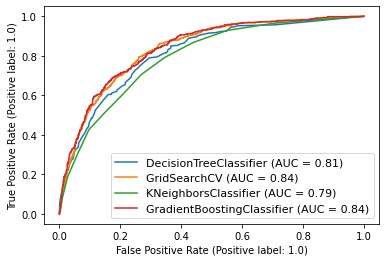

In [244]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(grid_Lr,x_test,y_test, ax=disp.ax_) #ax_ is axis with confusion matrix  ,it is way that combine other confusion mt
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gdbt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [245]:
#as per roc_plot GradientBoostingClassifier model is best among all excuted will save for future use
#model Saving
import pickle
file='pikle_gdbd_clf_model'
with open(file ,'wb') as file:
    pickle.dump(gdbt_clf, file) 